In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import datetime

In [2]:
# Load the dataset
df = pd.read_csv('TSLA.csv')

end_date = datetime.datetime.now() 
start_date = end_date - datetime.timedelta(days = 365 * 5)
stock_data = yf.download('TSLA', start=start_date.date(), end=end_date.date())

# Use only the 'Close' column
data = stock_data[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Define time step and split data
time_step = 100
X, y = create_dataset(scaled_data, time_step)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

[*********************100%***********************]  1 of 1 completed


In [3]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(100, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [4]:
model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 6s 154ms/step - loss: 0.0396 - val_loss: 0.0118
Epoch 2/100
15/15 [==============================] - 1s 97ms/step - loss: 0.0062 - val_loss: 0.0028
Epoch 3/100
15/15 [==============================] - 1s 96ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 4/100
15/15 [==============================] - 1s 96ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 5/100
15/15 [==============================] - 1s 95ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 6/100
15/15 [==============================] - 1s 90ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 7/100
15/15 [==============================] - 1s 94ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 8/100
15/15 [==============================] - 1s 94ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 9/100
15/15 [==============================] - 1s 95ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 10/100
15/15 [==============================] - 1s 100ms/step - loss: 0.0020 - val_loss: 0.00

In [5]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) # Undo scaling

8/8 [==============================] - 1s 23ms/step


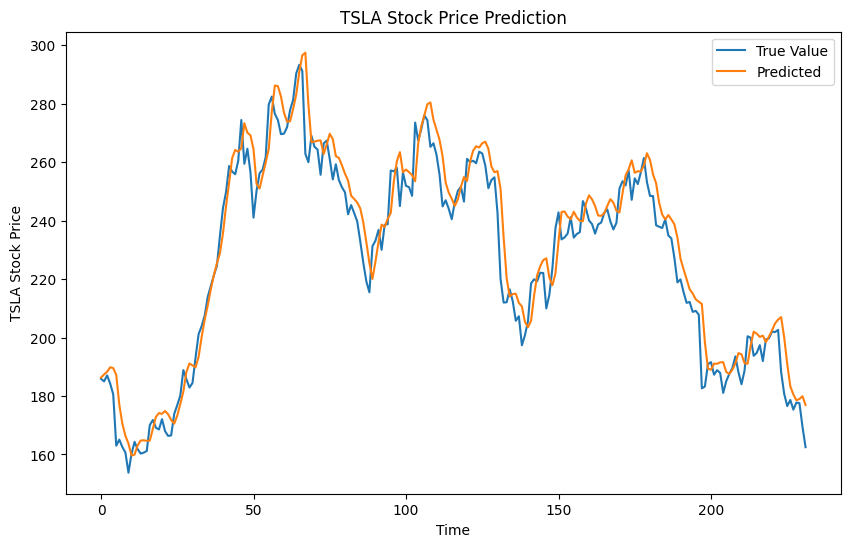

In [6]:
# plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)), label='True Value')

# plt.plot(predictions, label='Predicted')


# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)), label='True Value')
plt.plot(predictions, label='Predicted')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
